# Using both image and text features as a concatenated representation

In [1]:
# Imports
import os
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import json

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline  

plt.style.use('fivethirtyeight')

In [3]:
# Loading the data
from sklearn.externals import joblib
image_feats = joblib.load('image_feats.pkl')
text_feats = joblib.load('text_feats.pkl')

In [4]:
image_feats.shape

(1000, 18432)

In [5]:
text_feats.shape

(1000, 2012)

In [7]:
data = np.hstack((image_feats, text_feats))

In [8]:
data.shape

(1000, 20444)

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from itertools import cycle, islice

num_clusters = 11
num_seeds = 11
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}


# create k-means model with custom config
clustering_model = KMeans(n_clusters=num_clusters,max_iter=max_iterations,precompute_distances="auto", n_jobs=-1)

labels = clustering_model.fit_predict(data)
# print labels
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))


In [14]:
reduced_data = PCA(n_components=2).fit_transform(data)
reduced_data3 = PCA(n_components=3).fit_transform(data)

In [16]:
def save_fig(directory, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Method to save plots to the directory
    :param directory:
    :param fig_id:
    :param tight_layout:
    :param fig_extension:
    :param resolution:
    :return:
    """
    path = os.path.join(directory, fig_id + "." + fig_extension)
    print("Saving figure : " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [20]:
def walk_up_folder(path, depth=1):
    """
    Helper method to navigate the file system and get to the file location
    """
    _cur_depth = 1        
    while _cur_depth < depth:
        path = os.path.dirname(path)
        _cur_depth += 1
    return path

img_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'static/plots')
if not os.path.exists(img_path):
    os.makedirs(img_path)

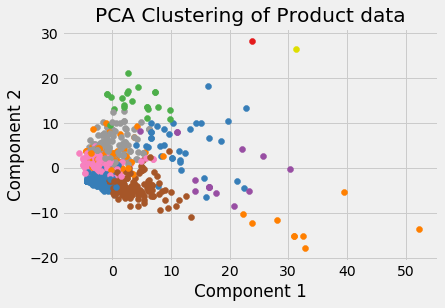

Saving figure : PCA2dcomb


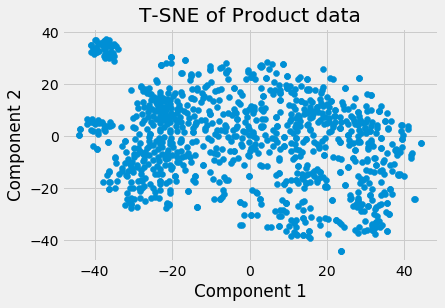

Saving figure : t-SNE2dcomb


In [22]:
fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = colors[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("PCA Clustering of Product data")
plt.show()
save_fig(img_path,"PCA2dcomb",False)


# t-SNE plot
embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(data)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("T-SNE of Product data")
plt.show()
save_fig(img_path,"t-SNE2dcomb",False)


Saving figure : PCA3dcombine


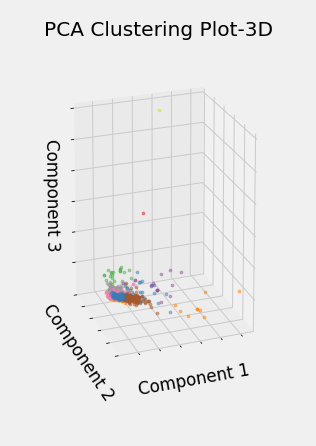

In [32]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=17, azim=250)
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2,pca_comp3 = reduced_data3[index]
    color = colors[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2,pca_comp3, c=color,alpha=0.5, s=10)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA Clustering Plot-3D')
ax.dist = 12
save_fig(img_path,"PCA3dcombine",False)

Saving figure : T-SNE3dcombine


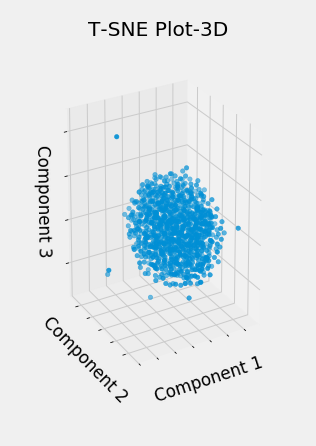

In [24]:
# t-SNE plot
embeddings = TSNE(n_components=3)
Y = embeddings.fit_transform(data)
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .7, 1], elev=20, azim=60)
ax.scatter(Y[:, 0], Y[:, 1],Y[:, 2], cmap=plt.cm.Spectral)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('T-SNE Plot-3D')
ax.dist = 12
save_fig(img_path,"T-SNE3dcombine",False)

In [25]:
label_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/label_final.txt')
labels

array([ 3,  9,  3,  2,  1,  3,  1,  1,  4,  9,  1,  3,  1,  5,  0,  9,  3,
        0,  3,  0,  0,  4,  4,  1,  3,  0,  1,  3,  1,  0,  1,  3,  8,  0,
        5,  1,  0,  1,  6,  3,  3,  3,  6,  9,  9,  3,  6,  0,  0,  3,  1,
        0,  0,  4,  4,  0,  0,  0,  1,  3,  3,  0,  1,  6,  4,  0,  6,  5,
        0,  6,  0,  0,  0,  6,  6,  0,  6,  0,  3,  3,  4,  1,  6,  0,  4,
        3,  0,  0,  3,  1,  1,  3,  3,  3,  3,  4,  3,  3,  3,  3,  1,  5,
        6,  4,  3,  3,  9,  1,  4,  3,  3,  0,  1,  3,  0,  4,  0,  1,  0,
        4,  1, 10,  0,  0,  0,  6,  6,  0,  1,  4,  4,  4,  0,  4,  0,  4,
        4,  4,  0,  0,  0,  4,  0,  0,  0,  4,  0,  2,  1,  1,  6,  9,  6,
        4,  4,  6,  3,  3,  1,  3,  4,  0,  3,  0, 10,  1,  6,  1,  3,  1,
        0,  0,  6,  3,  6,  3,  3,  1,  0,  3,  1,  9,  2,  3,  0,  1,  0,
        0,  0,  0,  0,  1,  3,  0,  0,  0,  4,  3,  6,  0,  4,  0,  0,  0,
        0,  4,  4,  4,  0,  0,  0,  6,  6,  6,  3,  6,  0,  0,  3,  6,  3,
        0,  3,  3,  6,  3

In [26]:
# Storing the labels into a separate file
with open(label_path, "w", encoding='utf-8') as target:
    for _ in range(len(labels)):
        target.write(str(labels[_]))
        target.write("\n")

# Appending labels to the input 

In [33]:
result_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'result.json')

In [35]:
import json
label_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/label_final.txt')
categories_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_categories.txt')
data_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_data.json')

with open(data_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

with open(categories_path, encoding='utf-8') as data_file:
    categories = data_file.read().split("\n")

label_mapping = {idx:val for idx,val in enumerate(categories)}
label_mapping

{0: 'Dresses',
 1: 'Tops',
 2: 'Jeans',
 3: 'Skirts',
 4: 'Rompers',
 5: 'Shoes',
 6: 'Bags',
 7: 'Jewelry',
 8: 'Swimwear',
 9: 'Intimates',
 10: 'Others'}